<h1><center> Car Price Prediction Multiple Linear Regression </center></h1>

## About Dataset

**Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car?
How well those variables describe the price of a car?

|-|Variable|Description|
|-|--------|-----------|
|1|Car_ID|Unique id of each observation |
|2|Symboling |Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.|
|3|carCompany|Name of car company|
|4|fueltype|Car fuel type i.e gas or diesel|
|5|aspiration|Aspiration used in a car|
|6|doornumber|Number of doors in a car |
|7|carbody|body of car|
|8|drivewheel|type of drive wheel|
|9|enginelocation|Location of car engine|
|10|wheelbase|Weelbase of car|
|11|carlength|Length of car|
|12|carwidth|Width of car|
|13|carheight|height of car|
|14|curbweight|The weight of a car without occupants or baggage.|
|15|enginetype|Type of engine|
|16|cylindernumber|cylinder placed in the car |
|17|enginesize|Size of car|
|18|fuelsystem|Fuel system of car|
|19|boreratio|Boreratio of car|
|20|stroke|Stroke or volume inside the engine |
|21|compressionratio|compression ratio of car|
|22|horsepower|Horsepower |
|23|peakrpm|car peak rpm |
|24|citympg|Mileage in city|
|25|highwaympg|Mileage on highway|
|26|price(Dependent variable)|Price of car |

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Load the Data</li>
        <li>Data Wrangling</li>
        <li>Dummy Variable</li>
        <li>Normal Distribution Test</li>
        <li>Transforms Data Into a Normal Distribution</li>
        <li>Remove Outliers</li>
        <li>Multiple Linear Regression</li>
        <li>Forward selection</li>
        <li>Final Estimated Linear Model</li>
        <li>Distribution Plot</li>

In [1]:
# import all libraries
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

## Load the Data

In [2]:
#import opendatasets as od
#od.download('https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/download?datasetVersionNumber=1')

In [3]:
df = pd.read_csv('car-price-prediction/CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
#display the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<li>Categorical, object(10): CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem </li>
<li>Continous, float64(8): wheelbase, carlength, carwidth, carheight, boreratio, stroke,  compressionratio, price </li>
<li>Discraete, int64(8): car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg </li>

## Data Wrangling

In [5]:
df.shape

(205, 26)

In [6]:
df.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
#check for missing values
#Which features contain blank, null or emply values?
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Unique Car company
df['CarName'] = df['CarName'].str.split(' ',1,expand=True).drop(1,axis=1)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typo Error in CarName**
<li>maxda = mazda</li>
<li>Nissan = nissan</li>
<li>porsche = porcshe</li>
<li>toyato = toyouta</li>
<li>vokswagan = volkswagan = vw</li>

In [9]:
#REnaming the typo errors in CarName 
df['CarName'] = df['CarName'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagan':'volkswagen','vw':'volkswagen'})

In [10]:
# changing the datatype of symboling as it is categorical variable as per dictionary file
df['symboling'] = df['symboling'].astype(str)

In [11]:
# dropped car_ID 
df = df.drop('car_ID',axis=1)

In [12]:
# checking for duplicates
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [13]:
# Segregation of Numerical and Categorical Variables/Columns
cat_col = df.select_dtypes(include=['object']).columns
con_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_con = df[con_col]

In [14]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


## Dummy Variable

In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [15]:
cat_dum = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [16]:
dummies = pd.get_dummies(df[cat_dum], dummy_na=True).astype('float64')
dummies.shape

(205, 78)

In [17]:
# Drop the original cat variables as dummies are already created
df.drop(cat_dum,axis=1,inplace=True)
df.shape

(205, 14)

## Normal Distribution Test

In [18]:
from scipy import stats
from scipy.stats import normaltest

In [19]:
for i in df_con.columns.values:
    a,b = stats.normaltest(df[[i]])
    alpha = 0.5
    print('p-value for',[i],'=','%.4f' %(b))
    if b < alpha:
        print('  The null hypothesis can be rejected*')
    else:
        print('  The null hypothesis can be accepted')

p-value for ['wheelbase'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['carlength'] = 0.6443
  The null hypothesis can be accepted
p-value for ['carwidth'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['carheight'] = 0.2747
  The null hypothesis can be rejected*
p-value for ['curbweight'] = 0.0009
  The null hypothesis can be rejected*
p-value for ['enginesize'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['boreratio'] = 0.0010
  The null hypothesis can be rejected*
p-value for ['stroke'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['compressionratio'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['horsepower'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['peakrpm'] = 0.8331
  The null hypothesis can be accepted
p-value for ['citympg'] = 0.0004
  The null hypothesis can be rejected*
p-value for ['highwaympg'] = 0.0041
  The null hypothesis can be rejected*
p-value for ['price'] = 0.0000
  The 

## Transforms Data Into a Normal Distribution

In [20]:
from sklearn.preprocessing import QuantileTransformer

In [21]:
#separate into input and output columns
y = df_con['price']
df_con = df_con.drop(columns=['price'],axis=1)

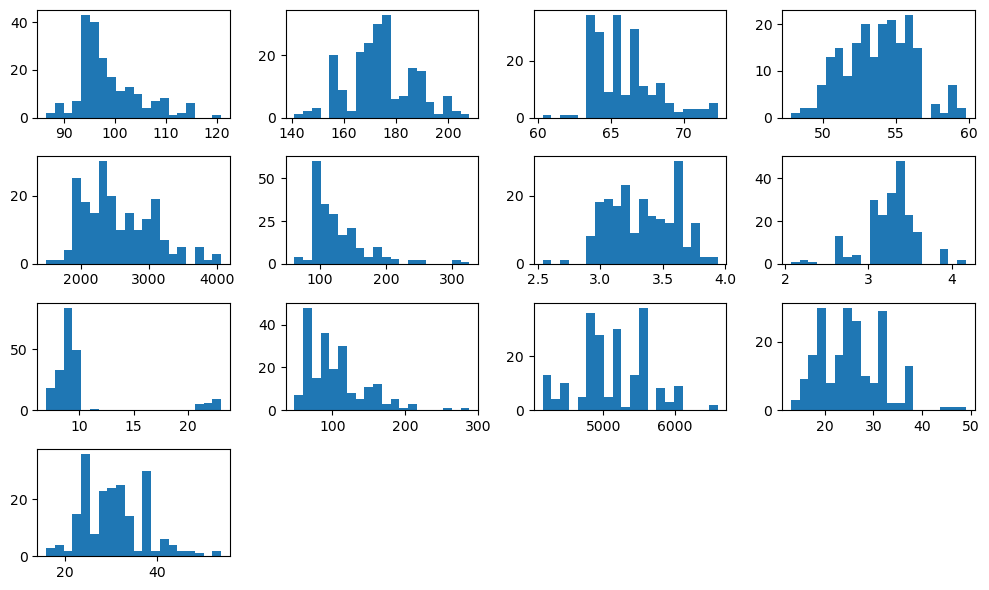

In [22]:
#plot histogram
plt.figure(figsize=(10, 6))
dfg = df_con.values
for i in range(dfg.shape[1]):
    plt.subplot(4,4,i+1)
    plt.hist(dfg[:,i],bins=20)

plt.tight_layout()
plt.show()

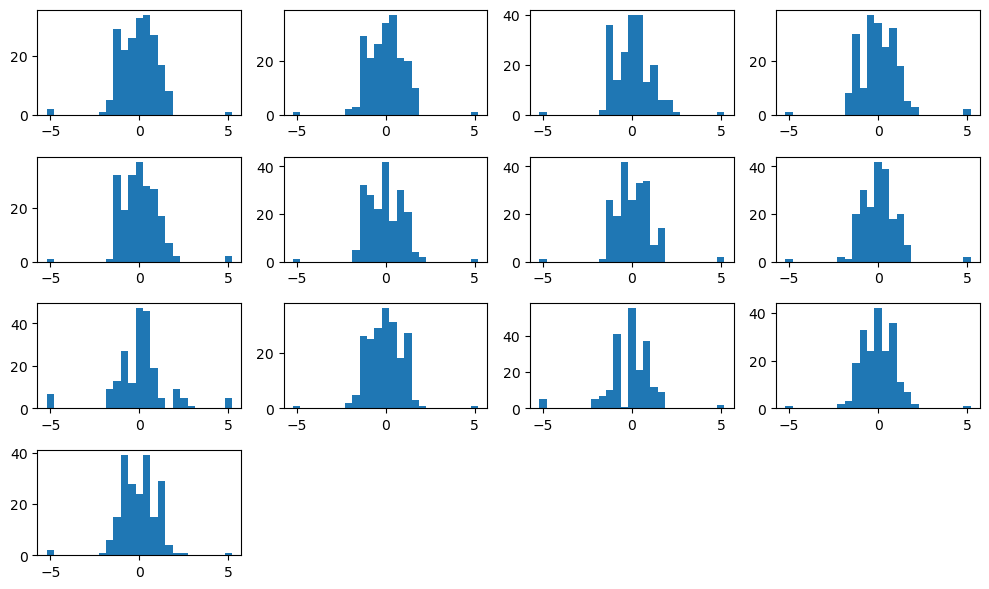

In [23]:
#tranform data to a normal distributio
qt = QuantileTransformer( n_quantiles=10, output_distribution="normal", random_state=42)

df_con_trans = qt.fit_transform(df_con)

# histogram of the transformed data
plt.figure(figsize=(10, 6))

for i in range(df_con_trans.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.hist(df_con_trans[:,i], bins=25)
    
plt.tight_layout()
plt.show()

In [24]:
#convert NumPy Array to Pandas DataFrame
con = pd.DataFrame(df_con_trans, columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])

## Remove Outliers 

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
#create a new dataset with transfrom and dummy variables
X_multi = pd.concat([con, dummies], axis=1)
X_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    float64
 5   enginesize             205 non-null    float64
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    float64
 10  peakrpm                205 non-null    float64
 11  citympg                205 non-null    float64
 12  highwaympg             205 non-null    float64
 13  symboling_-1           205 non-null    float64
 14  symboling_-2           205 non-null    float64
 15  symbol

In [27]:
X_multi.drop(['symboling_nan', 
        'CarName_nan', 
        'fueltype_nan',
        'aspiration_nan',
        'doornumber_nan',
        'carbody_nan',
        'drivewheel_nan',
        'enginelocation_nan',
        'enginetype_nan',
        'cylindernumber_nan',
        'fuelsystem_nan'], axis=1 ,inplace=True)
              
print('X_multi shape is: ' ,X_multi.shape)

X_multi shape is:  (205, 80)


In [28]:
#a cleaning of the outliers with a IsolationForest method.
print('dataset before outlier cleaning', X_multi.shape, y.shape)

#call and fit the Isolation Forest detector
iforest = IsolationForest(contamination=0.1).fit(X_multi.values)
yhat = iforest.predict(X_multi.values)
#select all rows that are not outliers
mask = yhat != -1
X_multi = X_multi.loc[mask, :]
y = y.loc[mask]

print('dataset after outlier cleaning:' ,X_multi.shape, y.shape)

dataset before outlier cleaning (205, 80) (205,)
dataset after outlier cleaning: (184, 80) (184,)


In [29]:
#clean missing after transform data
#Total missing values for each feature
print(X_multi.isnull().sum())

wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 80, dtype: int64


In [30]:
# Any missing values?
print(X_multi.isnull().values.any())

False


<AxesSubplot: >

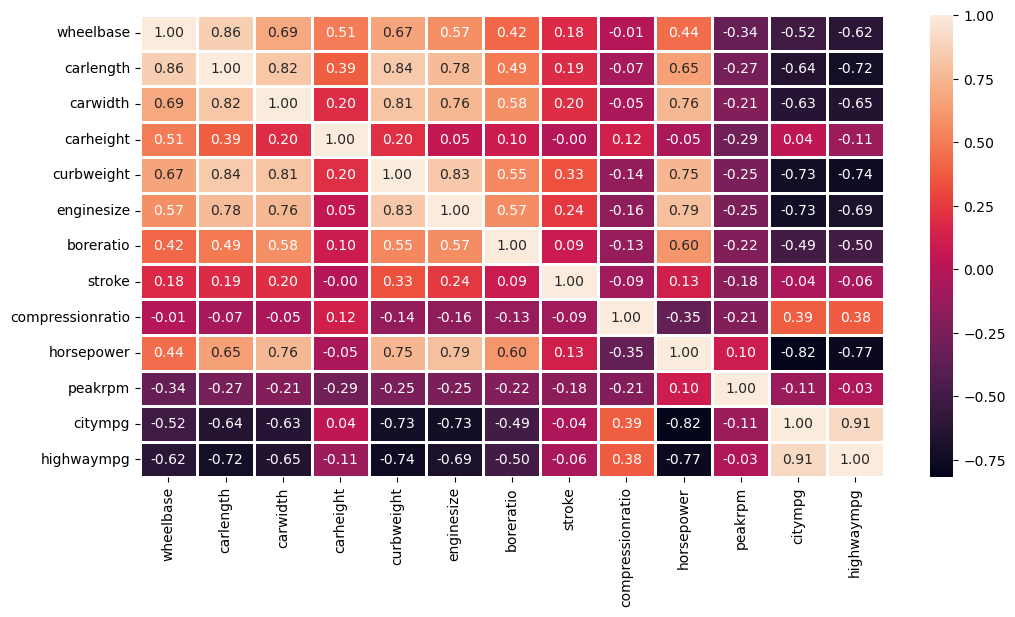

In [31]:
#find correlated columns
plt.figure(figsize=(12,6))
sns.heatmap(con.corr(), annot=True, fmt='.2f', linewidths=2)

## Multiple Linear Regression

<div align="center">Y: Response Variable</div>
<div align="center">X<sub>1</sub>: Predictor Variable 1</div>
<div align="center">X<sub>2</sub>: Predictor Variable 2</div>
<div align="center">: </div>
<div align="center">X<sub>i</sub>: Predictor Variable i</div>

<div align="center">a: intercept</div>
<div align="center">b<sub>1</sub>: coefficients of Variable 1</div>
<div align="center">b<sub>2</sub>: coefficients of Variable 2</div>
<div align="center">:</div>
<div align="center">b<sub>i</sub>: coefficients of Variable i</div>

The equation is given by:

<div align="center">Yhat = a + b<sub>1</sub> X<sub>1</sub> + b<sub>2</sub> X<sub>2</sub> + ... + b<sub>i</sub> X<sub>i</sub></div>

In [32]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(y,X_multi).fit()
summary = model.summary()
print(summary)
#the null hypothesis is beta(i) = 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     33.97
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.09e-54
Time:                        23:19:19   Log-Likelihood:                -1612.2
No. Observations:                 184   AIC:                             3346.
Df Residuals:                     123   BIC:                             3542.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase               111.21

## Forward selection

In [34]:
def forward_stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out =0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        initial_list = []
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series([],dtype=pd.StringDtype())
            
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                    
            if not changed:
                break
                
        return included     
    
#[1]: http://planspace.org/20150423-forward_selection_with_statsmodels/
#[2]: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [35]:
result = forward_stepwise_selection(X_multi, y)

print('resulting features:')
print(result)

Add  enginelocation_front           with p-value 2.93477e-61
Add  curbweight                     with p-value 2.10918e-46
Add  CarName_bmw                    with p-value 7.31999e-18
Add  CarName_buick                  with p-value 7.85265e-13
Add  carwidth                       with p-value 9.3471e-07
Add  wheelbase                      with p-value 0.000315378
Add  peakrpm                        with p-value 0.00172502
Add  carbody_convertible            with p-value 0.00461782
Add  cylindernumber_four            with p-value 0.00629866
Add  CarName_porsche                with p-value 0.00620761
Add  CarName_volvo                  with p-value 0.00282108
Add  aspiration_std                 with p-value 0.00738859
Add  aspiration_turbo               with p-value 1.43502e-30
Add  cylindernumber_eight           with p-value 0.00663811
Add  CarName_mitsubishi             with p-value 0.00537175
Add  carbody_wagon                  with p-value 0.0058377
resulting features:
['enginelocatio

## Final Estimated Linear Model

In [36]:
X_multi_selected = X_multi[['enginelocation_front', 'curbweight', 'CarName_bmw', 'CarName_buick', 'carwidth', 'wheelbase', 'peakrpm', 'carbody_convertible', 'cylindernumber_four', 'CarName_porsche', 'CarName_volvo', 'aspiration_std', 'aspiration_turbo', 'cylindernumber_eight', 'CarName_mitsubishi', 'carbody_wagon']]

### Checking VIF

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

In general terms,

<div>VIF equal to 1 = variables are not correlated </div>
<div>VIF between 1 and 5 = variables are moderately correlated </div>
<div>VIF greater than 5 = variables are highly correlated </div>

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_multi_selected.columns

np.seterr(divide='ignore', invalid='ignore')
vif['VIF'] = [variance_inflation_factor(X_multi_selected.values, i) 
              for i in range(X_multi_selected.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features       VIF
11        aspiration_std       inf
12      aspiration_turbo       inf
4               carwidth  3.811710
1             curbweight  3.479248
3          CarName_buick  3.291017
13  cylindernumber_eight  3.211866
5              wheelbase  2.837290
8    cylindernumber_four  2.069426
10         CarName_volvo  1.250978
7    carbody_convertible  1.227740
2            CarName_bmw  1.217044
14    CarName_mitsubishi  1.144848
6                peakrpm  1.120422
15         carbody_wagon  1.113249
9        CarName_porsche  1.089123
0   enginelocation_front  0.000000


In [39]:
model = sm.OLS(y,X_multi_selected).fit()
summary = model.summary()
print(summary)
#the null hypothesis is beta(i) = 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     127.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           6.47e-82
Time:                        23:19:46   Log-Likelihood:                -1650.8
No. Observations:                 184   AIC:                             3332.
Df Residuals:                     169   BIC:                             3380.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
enginelocation_front  9567.6686 

<div>Multiple R-squared: 0.913, Adjusted R-squared: 0.906</div>
<div>This means that 91.30% of the variation in the response variable can be explained by the 14 predictor variables in the model.</div>

Using this output, we can write the equation for the fitted regression model:

**Yhat** = 14,351.50 +9,567.67(**Enginelocation_front**) +3,399.73(**Curbweight**) +1,403.98(**Carwidth**) -291.06(**Wheelbase**) +416.68(**Peakrpm**) +3,325.39(**Carbody_convertible**)   +3,878.64(**Aspiration_std**)  +5,689.03(**Aspiration_turbo**) +7,604.53(**Cylindernumber_eight**) -1,866.97(**CarName_mitsubishi**) +10,760(**CarName_bmw**) +4,104.46(**CarName_buick**) -1331.50(**Carbody_wagon**) +7,168.94(**CarName_porsche**) +2,032.87(**CarName_volvo**)    

## Distribution Plot

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [40]:
#Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression

In [41]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [42]:
lm.fit(X_multi_selected,y)

LinearRegression()

In [45]:
#We can output a prediction:
Yhat= lm.predict(X_multi_selected)
Yhat[0:10]  

array([14564.38239662, 14564.38239662, 15321.18295879, 10846.26949123,
       15930.60266774, 14523.63344487, 18035.24481054, 17188.59563846,
       21127.2739152 , 21421.37097323])

In [47]:
#the value of the intercept (a)?
lm.intercept_

14351.502828060962

<Figure size 400x300 with 0 Axes>

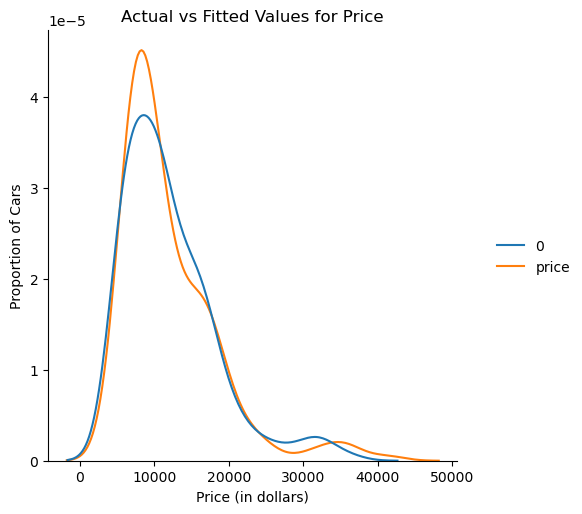

In [48]:
plt.figure(figsize=(4, 3))

sns.displot([Yhat,y], kind="kde")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

___

## References
<br>[Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?datasetId=383055&sortBy=voteCount)</br>
<br>การวิเคราะห์การถดถอยและการประยุกต์ใช้ด้วยโปรแกรม R ,รศ.ดร. เพียรพูล กมลจิตร์ประภา</br>

___

Gawragod Kuchaiyaphum